Final loss=0.289


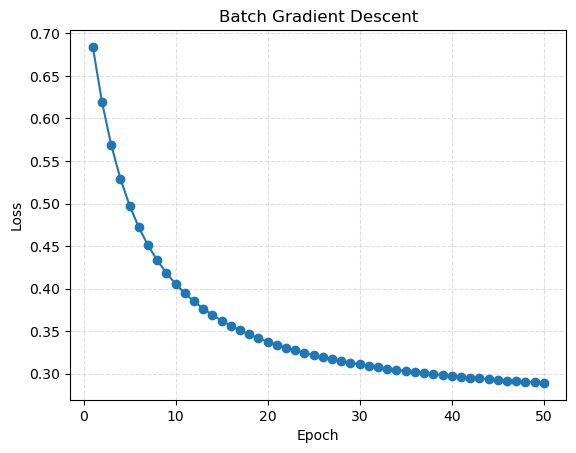

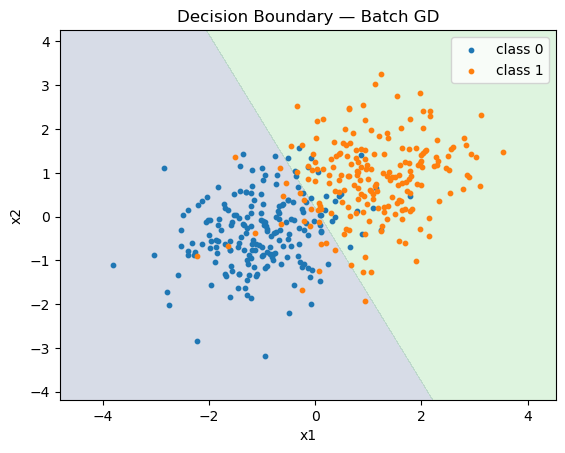

In [1]:
# batch_gd_logreg.py Batch Gradient Descent
import numpy as np, matplotlib.pyplot as plt

# ---- data ----
rng = np.random.default_rng(1337)
n_per_class = 200
mean0, mean1 = np.array([-1.0, -0.5]), np.array([1.0, 0.8])
cov = np.array([[0.8, 0.2],[0.2, 0.8]])
X0 = rng.multivariate_normal(mean0, cov, size=n_per_class)
X1 = rng.multivariate_normal(mean1, cov, size=n_per_class)
X = np.vstack([X0, X1]).astype(np.float64)
y = np.hstack([np.zeros(n_per_class), np.ones(n_per_class)])
Xb = np.hstack([X, np.ones((X.shape[0], 1))])  # add bias

sigmoid = lambda z: 1/(1+np.exp(-z))

def loss_and_grad(W, Xb, y):
    p = sigmoid(Xb @ W)
    eps = 1e-12
    L = -np.mean(y*np.log(p+eps) + (1-y)*np.log(1-p+eps))
    g = Xb.T @ (p - y) / Xb.shape[0]
    return L, g

def acc(W): return (sigmoid(Xb @ W) >= 0.5).astype(int).mean() == y.mean()  # not used

# ---- training (batch GD) ----
eta, epochs = 0.2, 50
W = rng.normal(scale=0.01, size=3)
losses = []
for _ in range(epochs):
    L, g = loss_and_grad(W, Xb, y)
    W -= eta * g
    losses.append(L)

print(f"Final loss={losses[-1]:.3f}")

# ---- plots ----
plt.figure()
plt.plot(range(1, epochs+1), losses, marker='o')
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title("Batch Gradient Descent")
plt.grid(True, ls="--", alpha=.4)
plt.show()

# decision boundary
x1_min,x1_max = X[:,0].min()-1, X[:,0].max()+1
x2_min,x2_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x1_min,x1_max,200),
                     np.linspace(x2_min,x2_max,200))
grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.size)]
probs = sigmoid(grid @ W).reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, probs, levels=[0, .5, 1], alpha=.2)
plt.scatter(X0[:,0], X0[:,1], s=10, label="class 0")
plt.scatter(X1[:,0], X1[:,1], s=10, label="class 1")
plt.legend(); plt.xlabel("x1"); plt.ylabel("x2")
plt.title("Decision Boundary — Batch GD")
plt.show()


Final loss=0.270


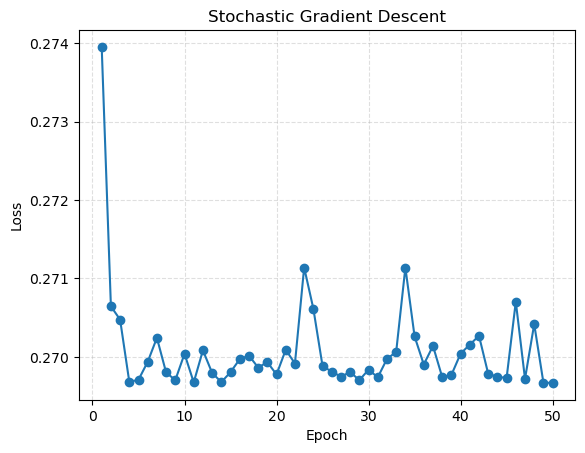

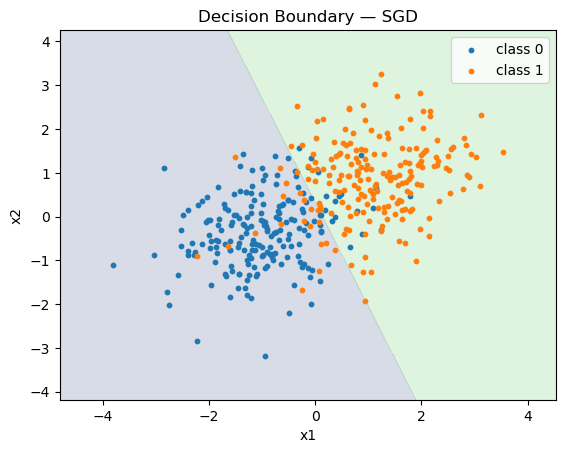

In [2]:
# sgd_logreg.py Stochastic Gradient Descent (sample-by-sample)
import numpy as np, matplotlib.pyplot as plt

# ---- data ----
rng = np.random.default_rng(1337)
n_per_class = 200
mean0, mean1 = np.array([-1.0, -0.5]), np.array([1.0, 0.8])
cov = np.array([[0.8, 0.2],[0.2, 0.8]])
X0 = rng.multivariate_normal(mean0, cov, size=n_per_class)
X1 = rng.multivariate_normal(mean1, cov, size=n_per_class)
X = np.vstack([X0, X1]).astype(np.float64)
y = np.hstack([np.zeros(n_per_class), np.ones(n_per_class)])
Xb = np.hstack([X, np.ones((X.shape[0], 1))])

sigmoid = lambda z: 1/(1+np.exp(-z))
def full_loss(W):
    p = sigmoid(Xb @ W); eps=1e-12
    return -np.mean(y*np.log(p+eps) + (1-y)*np.log(1-p+eps))

# ---- training (SGD) ----
eta, epochs = 0.05, 50
W = rng.normal(scale=0.01, size=3)
losses = []
for _ in range(epochs):
    idx = rng.permutation(Xb.shape[0])
    for i in idx:
        xi = Xb[i]
        yi = y[i]
        pi = sigmoid(xi @ W)
        grad_i = (pi - yi) * xi
        W -= eta * grad_i
    losses.append(full_loss(W))

print(f"Final loss={losses[-1]:.3f}")

# ---- plots ----
plt.figure()
plt.plot(range(1, epochs+1), losses, marker='o')
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent")
plt.grid(True, ls="--", alpha=.4)
plt.show()

# decision boundary
x1_min,x1_max = X[:,0].min()-1, X[:,0].max()+1
x2_min,x2_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x1_min,x1_max,200),
                     np.linspace(x2_min,x2_max,200))
grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.size)]
probs = sigmoid(grid @ W).reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, probs, levels=[0, .5, 1], alpha=.2)
plt.scatter(X0[:,0], X0[:,1], s=10, label="class 0")
plt.scatter(X1[:,0], X1[:,1], s=10, label="class 1")
plt.legend(); plt.xlabel("x1"); plt.ylabel("x2")
plt.title("Decision Boundary — SGD")
plt.show()


Final loss=0.280


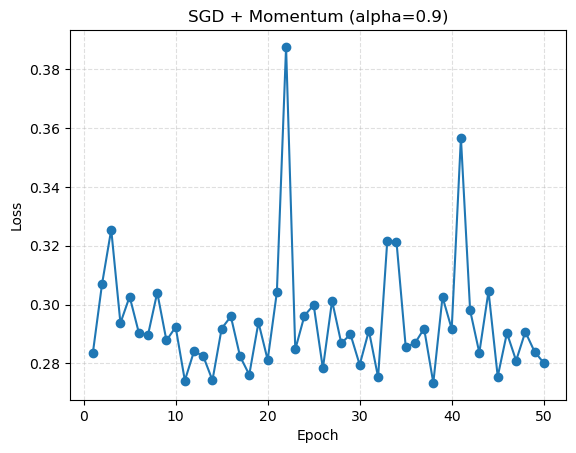

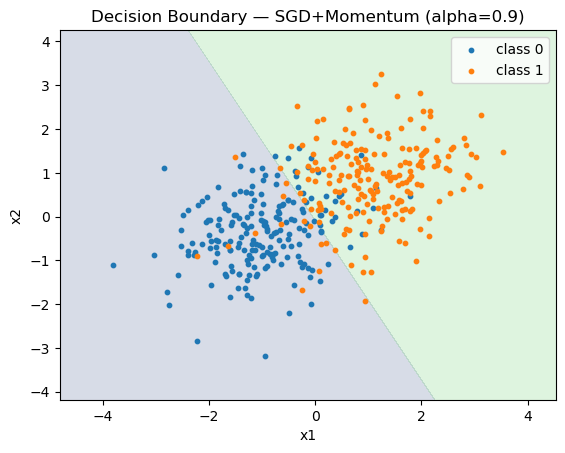

In [3]:
# sgd_momentum_logreg.py  SGD with Momentum (α)
import numpy as np, matplotlib.pyplot as plt

# ---- data ----
rng = np.random.default_rng(1337)
n_per_class = 200
mean0, mean1 = np.array([-1.0, -0.5]), np.array([1.0, 0.8])
cov = np.array([[0.8, 0.2],[0.2, 0.8]])
X0 = rng.multivariate_normal(mean0, cov, size=n_per_class)
X1 = rng.multivariate_normal(mean1, cov, size=n_per_class)
X = np.vstack([X0, X1]).astype(np.float64)
y = np.hstack([np.zeros(n_per_class), np.ones(n_per_class)])
Xb = np.hstack([X, np.ones((X.shape[0], 1))])

sigmoid = lambda z: 1/(1+np.exp(-z))
def full_loss(W):
    p = sigmoid(Xb @ W); eps=1e-12
    return -np.mean(y*np.log(p+eps) + (1-y)*np.log(1-p+eps))

# ---- training (SGD + Momentum) ----
eta, alpha, epochs = 0.05, 0.9, 50
W = rng.normal(scale=0.01, size=3)
v = np.zeros_like(W)  # ΔW(t) buffer
losses = []
for _ in range(epochs):
    idx = rng.permutation(Xb.shape[0])
    for i in idx:
        xi = Xb[i]
        yi = y[i]
        pi = sigmoid(xi @ W)
        grad_i = (pi - yi) * xi
        # ΔW(t+1) = -η ∇E + α ΔW(t)
        v = -eta * grad_i + alpha * v
        W = W + v
    losses.append(full_loss(W))

print(f"Final loss={losses[-1]:.3f}")

# ---- plots ----
plt.figure()
plt.plot(range(1, epochs+1), losses, marker='o')
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title(f"SGD + Momentum (alpha={alpha})")
plt.grid(True, ls="--", alpha=.4)
plt.show()

# decision boundary
x1_min,x1_max = X[:,0].min()-1, X[:,0].max()+1
x2_min,x2_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x1_min,x1_max,200),
                     np.linspace(x2_min,x2_max,200))
grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.size)]
probs = sigmoid(grid @ W).reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, probs, levels=[0, .5, 1], alpha=.2)
plt.scatter(X0[:,0], X0[:,1], s=10, label="class 0")
plt.scatter(X1[:,0], X1[:,1], s=10, label="class 1")
plt.legend(); plt.xlabel("x1"); plt.ylabel("x2")
plt.title(f"Decision Boundary — SGD+Momentum (alpha={alpha})")
plt.show()


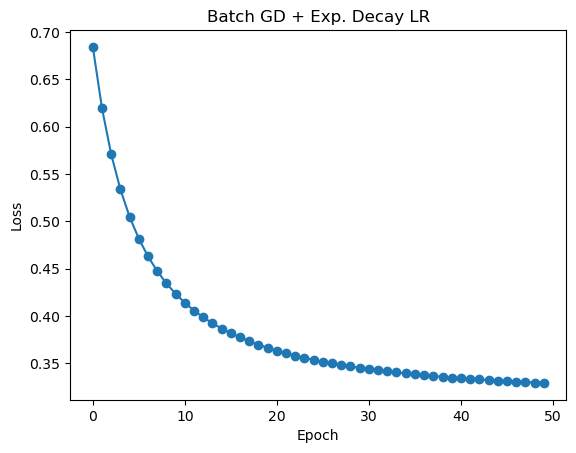

In [4]:
# Batch GD with Exponential Decay LR
import numpy as np, matplotlib.pyplot as plt

# ---- dataset ----
rng = np.random.default_rng(1337)
n = 200
mean0, mean1 = np.array([-1, -0.5]), np.array([1, 0.8])
cov = np.array([[0.8, 0.2],[0.2, 0.8]])
X0 = rng.multivariate_normal(mean0, cov, n)
X1 = rng.multivariate_normal(mean1, cov, n)
X = np.vstack([X0, X1]); y = np.hstack([np.zeros(n), np.ones(n)])
Xb = np.hstack([X, np.ones((X.shape[0], 1))])

sigmoid = lambda z: 1/(1+np.exp(-z))
def loss_grad(W): 
    p=sigmoid(Xb@W); eps=1e-12
    L=-np.mean(y*np.log(p+eps)+(1-y)*np.log(1-p+eps))
    g=Xb.T@(p-y)/Xb.shape[0]; return L,g

# ---- train ----
eta0, delta, epochs = 0.2, 0.96, 50
W=rng.normal(scale=0.01,size=3); losses=[]
for t in range(epochs):
    L,g=loss_grad(W)
    eta=eta0*(delta**t)             # exponential decay
    W-=eta*g; losses.append(L)

plt.plot(losses,marker='o'); plt.title("Batch GD + Exp. Decay LR")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.show()


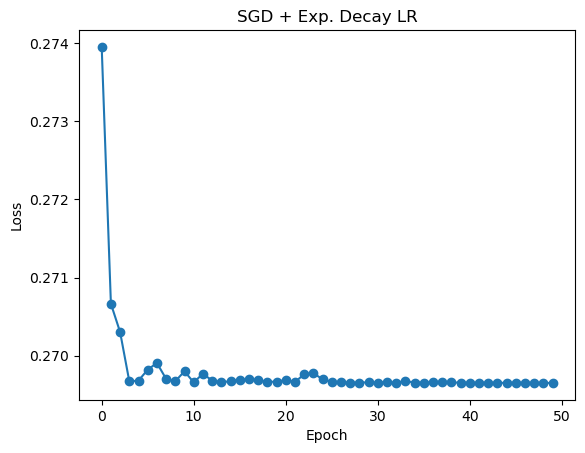

In [5]:
#SGD (sample-wise) with Exponential Decay LR
import numpy as np, matplotlib.pyplot as plt

# ---- dataset ----
rng = np.random.default_rng(1337)
n = 200
mean0, mean1 = np.array([-1, -0.5]), np.array([1, 0.8])
cov = np.array([[0.8,0.2],[0.2,0.8]])
X0 = rng.multivariate_normal(mean0,cov,n)
X1 = rng.multivariate_normal(mean1,cov,n)
X=np.vstack([X0,X1]); y=np.hstack([np.zeros(n),np.ones(n)])
Xb=np.hstack([X,np.ones((X.shape[0],1))])

sigmoid=lambda z:1/(1+np.exp(-z))
def full_loss(W):
    p=sigmoid(Xb@W); eps=1e-12
    return -np.mean(y*np.log(p+eps)+(1-y)*np.log(1-p+eps))

# ---- train ----
eta0, delta, epochs = 0.05, 0.96, 50
W=rng.normal(scale=0.01,size=3); losses=[]
for t in range(epochs):
    eta=eta0*(delta**t)             # exponential decay
    idx=rng.permutation(len(y))
    for i in idx:
        xi,yi=Xb[i],y[i]; pi=sigmoid(xi@W)
        grad=(pi-yi)*xi
        W-=eta*grad
    losses.append(full_loss(W))

plt.plot(losses,marker='o'); plt.title("SGD + Exp. Decay LR")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.show()


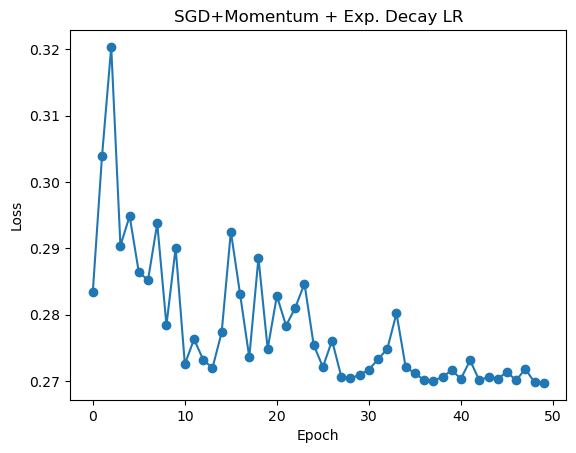

In [7]:
#SGD with Momentum + Exponential Decay LR
import numpy as np, matplotlib.pyplot as plt

# ---- dataset ----
rng = np.random.default_rng(1337)
n=200
mean0,mean1=np.array([-1,-0.5]),np.array([1,0.8])
cov=np.array([[0.8,0.2],[0.2,0.8]])
X0=rng.multivariate_normal(mean0,cov,n)
X1=rng.multivariate_normal(mean1,cov,n)
X=np.vstack([X0,X1]); y=np.hstack([np.zeros(n),np.ones(n)])
Xb=np.hstack([X,np.ones((X.shape[0],1))])

sigmoid=lambda z:1/(1+np.exp(-z))
def full_loss(W):
    p=sigmoid(Xb@W); eps=1e-12
    return -np.mean(y*np.log(p+eps)+(1-y)*np.log(1-p+eps))

# ---- train ----
eta0, delta, alpha, epochs = 0.05, 0.96, 0.9, 50
W=rng.normal(scale=0.01,size=3); v=np.zeros_like(W); losses=[]
for t in range(epochs):
    eta=eta0*(delta**t)             # exponential decay
    idx=rng.permutation(len(y))
    for i in idx:
        xi,yi=Xb[i],y[i]; pi=sigmoid(xi@W)
        grad=(pi-yi)*xi
        v = -eta*grad + alpha*v
        W = W+v
    losses.append(full_loss(W))

plt.plot(losses,marker='o'); plt.title("SGD+Momentum + Exp. Decay LR")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.show()


Final loss=0.0495


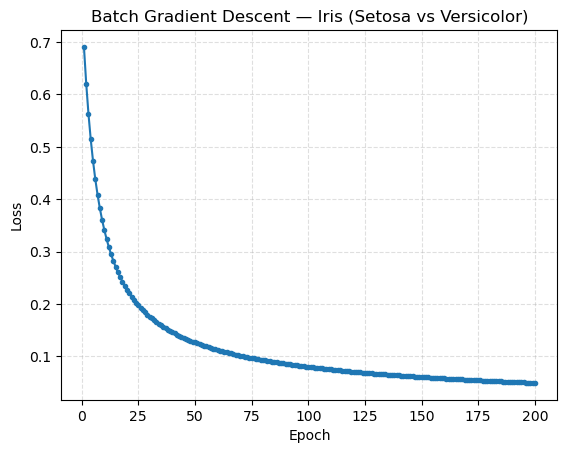

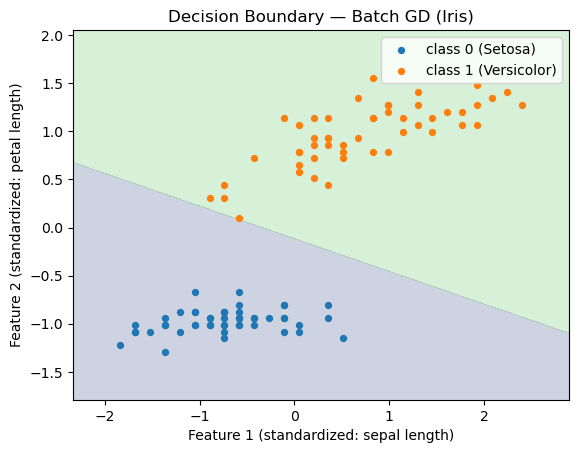

In [8]:
# batch_gd_logreg.py — Batch Gradient Descent on REAL DATA (Iris: Setosa vs Versicolor)
import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# ---- load real data (Iris) ----
# Use two classes (0: setosa, 1: versicolor) and two features for 2D plotting
iris = load_iris()
X_all = iris.data[:, [0, 2]]  # e.g., [sepal length, petal length]
y_all = iris.target

mask = (y_all == 0) | (y_all == 1)          # keep only two classes
X = X_all[mask].astype(np.float64)
y = y_all[mask].astype(np.float64)          # 0 or 1 already

# Standardize features for stable gradients
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias term
Xb = np.hstack([X, np.ones((X.shape[0], 1))])

# Split by class for plotting
X0 = X[y == 0]
X1 = X[y == 1]

# ---- logistic regression bits ----
sigmoid = lambda z: 1.0 / (1.0 + np.exp(-z))

def loss_and_grad(W, Xb, y):
    p = sigmoid(Xb @ W)
    eps = 1e-12
    L = -np.mean(y * np.log(p + eps) + (1 - y) * np.log(1 - p + eps))
    g = Xb.T @ (p - y) / Xb.shape[0]
    return L, g

# ---- training (batch GD) ----
rng = np.random.default_rng(1337)
eta, epochs = 0.2, 200
W = rng.normal(scale=0.01, size=3)
losses = []
for _ in range(epochs):
    L, g = loss_and_grad(W, Xb, y)
    W -= eta * g
    losses.append(L)

print(f"Final loss={losses[-1]:.4f}")

# ---- plots ----
plt.figure()
plt.plot(range(1, epochs+1), losses, marker='o', ms=3)
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title("Batch Gradient Descent — Iris (Setosa vs Versicolor)")
plt.grid(True, ls="--", alpha=.4)
plt.show()

# ---- decision boundary (in standardized feature space) ----
x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 300),
                     np.linspace(x2_min, x2_max, 300))
grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.size)]
probs = sigmoid(grid @ W).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.25)
plt.scatter(X0[:, 0], X0[:, 1], s=18, label="class 0 (Setosa)")
plt.scatter(X1[:, 0], X1[:, 1], s=18, label="class 1 (Versicolor)")
plt.legend()
plt.xlabel("Feature 1 (standardized: sepal length)")
plt.ylabel("Feature 2 (standardized: petal length)")
plt.title("Decision Boundary — Batch GD (Iris)")
plt.show()


Final loss=0.0034


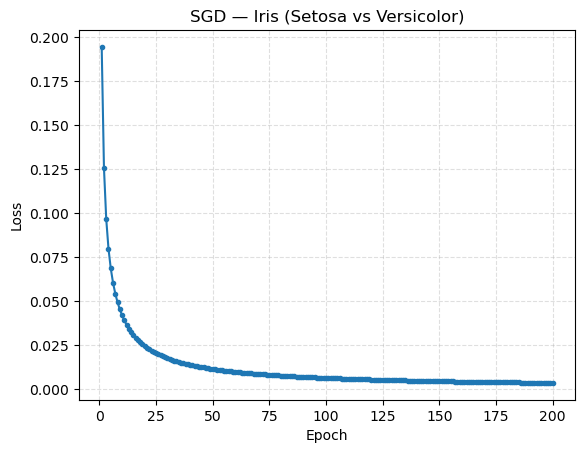

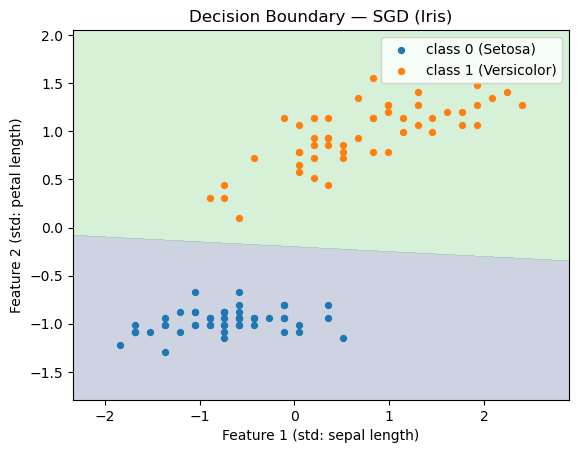

In [9]:
# sgd_iris_logreg.py — Logistic Regression with SGD on Iris (Setosa vs Versicolor)
import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# ---- load real data (Iris) ----
iris = load_iris()
X_all = iris.data[:, [0, 2]]  # sepal length, petal length
y_all = iris.target

mask = (y_all == 0) | (y_all == 1)  # keep only Setosa (0) and Versicolor (1)
X = X_all[mask].astype(np.float64)
y = y_all[mask].astype(np.float64)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias term
Xb = np.hstack([X, np.ones((X.shape[0], 1))])

# Split by class for plotting
X0 = X[y == 0]
X1 = X[y == 1]

# ---- model helpers ----
sigmoid = lambda z: 1.0 / (1.0 + np.exp(-z))
def full_loss(W):
    p = sigmoid(Xb @ W); eps = 1e-12
    return -np.mean(y*np.log(p+eps) + (1-y)*np.log(1-p+eps))

# ---- training (SGD) ----
rng = np.random.default_rng(1337)
eta, epochs = 0.05, 200
W = rng.normal(scale=0.01, size=3)

losses = []
for _ in range(epochs):
    idx = rng.permutation(len(y))
    for i in idx:
        xi = Xb[i]                 # shape (3,)
        yi = y[i]
        pi = sigmoid(xi @ W)
        grad = (pi - yi) * xi      # per-sample gradient
        W -= eta * grad
    losses.append(full_loss(W))

print(f"Final loss={losses[-1]:.4f}")

# ---- plots ----
plt.figure()
plt.plot(range(1, epochs+1), losses, marker='o', ms=3)
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title("SGD — Iris (Setosa vs Versicolor)")
plt.grid(True, ls="--", alpha=.4)
plt.show()

# decision boundary
x1_min, x1_max = X[:,0].min()-0.5, X[:,0].max()+0.5
x2_min, x2_max = X[:,1].min()-0.5, X[:,1].max()+0.5
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 300),
                     np.linspace(x2_min, x2_max, 300))
grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.size)]
probs = sigmoid(grid @ W).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.25)
plt.scatter(X0[:,0], X0[:,1], s=18, label="class 0 (Setosa)")
plt.scatter(X1[:,0], X1[:,1], s=18, label="class 1 (Versicolor)")
plt.legend()
plt.xlabel("Feature 1 (std: sepal length)")
plt.ylabel("Feature 2 (std: petal length)")
plt.title("Decision Boundary — SGD (Iris)")
plt.show()


Final loss=0.0005


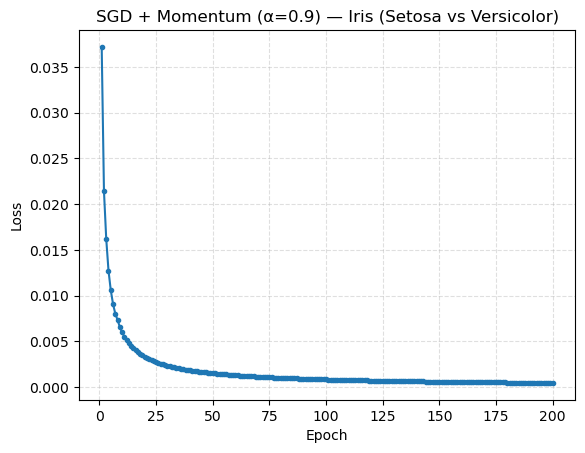

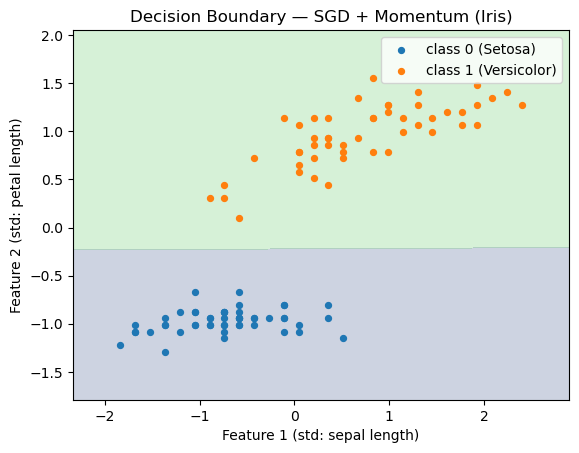

In [10]:
# sgd_momentum_iris_logreg.py — Logistic Regression with SGD+Momentum on Iris (Setosa vs Versicolor)
import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# ---- load real data (Iris) ----
iris = load_iris()
X_all = iris.data[:, [0, 2]]  # sepal length, petal length
y_all = iris.target

mask = (y_all == 0) | (y_all == 1)  # Setosa (0) and Versicolor (1)
X = X_all[mask].astype(np.float64)
y = y_all[mask].astype(np.float64)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias term
Xb = np.hstack([X, np.ones((X.shape[0], 1))])

# Split by class for plotting
X0 = X[y == 0]
X1 = X[y == 1]

# ---- model helpers ----
sigmoid = lambda z: 1.0 / (1.0 + np.exp(-z))
def full_loss(W):
    p = sigmoid(Xb @ W); eps = 1e-12
    return -np.mean(y*np.log(p+eps) + (1-y)*np.log(1-p+eps))

# ---- training (SGD + Momentum) ----
rng = np.random.default_rng(1337)
eta, alpha, epochs = 0.05, 0.9, 200
W = rng.normal(scale=0.01, size=3)
v = np.zeros_like(W)  # momentum buffer (ΔW(t))

losses = []
for _ in range(epochs):
    idx = rng.permutation(len(y))
    for i in idx:
        xi = Xb[i]                 # shape (3,)
        yi = y[i]
        pi = sigmoid(xi @ W)
        grad = (pi - yi) * xi
        # ΔW(t+1) = -η ∇E + α ΔW(t)
        v = -eta * grad + alpha * v
        W = W + v
    losses.append(full_loss(W))

print(f"Final loss={losses[-1]:.4f}")

# ---- plots ----
plt.figure()
plt.plot(range(1, epochs+1), losses, marker='o', ms=3)
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title(f"SGD + Momentum (α={alpha}) — Iris (Setosa vs Versicolor)")
plt.grid(True, ls="--", alpha=.4)
plt.show()

# decision boundary
x1_min, x1_max = X[:,0].min()-0.5, X[:,0].max()+0.5
x2_min, x2_max = X[:,1].min()-0.5, X[:,1].max()+0.5
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 300),
                     np.linspace(x2_min, x2_max, 300))
grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.size)]
probs = sigmoid(grid @ W).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.25)
plt.scatter(X0[:,0], X0[:,1], s=18, label="class 0 (Setosa)")
plt.scatter(X1[:,0], X1[:,1], s=18, label="class 1 (Versicolor)")
plt.legend()
plt.xlabel("Feature 1 (std: sepal length)")
plt.ylabel("Feature 2 (std: petal length)")
plt.title("Decision Boundary — SGD + Momentum (Iris)")
plt.show()


Final loss = 0.3499


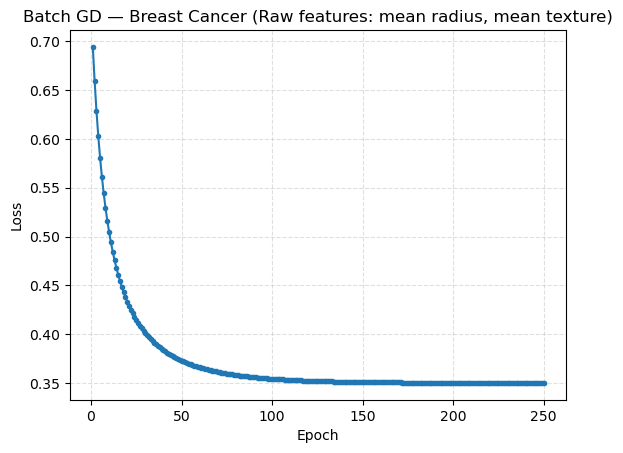

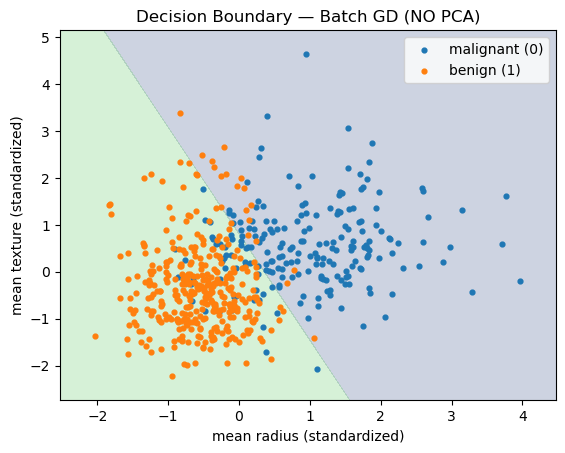

In [17]:
# batch_gd_breast_cancer_no_pca.py — Logistic Regression (Batch GD, NO PCA)
import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# ---- load + select two raw features (no PCA) ----
data = load_breast_cancer()
X_raw = data.data[:, [0, 1]].astype(np.float64)  # mean radius, mean texture
y = data.target.astype(np.float64)               # 0=malignant, 1=benign

# standardize features (fit on full set for demo simplicity)
X = StandardScaler().fit_transform(X_raw)

# add bias term
Xb = np.hstack([X, np.ones((X.shape[0], 1))])

# split by class for plotting
X0 = X[y == 0]  # malignant
X1 = X[y == 1]  # benign

sigmoid = lambda z: 1.0 / (1.0 + np.exp(-z))
def loss_and_grad(W):
    p = sigmoid(Xb @ W)
    eps = 1e-12
    L = -np.mean(y*np.log(p+eps) + (1-y)*np.log(1-p+eps))
    g = Xb.T @ (p - y) / Xb.shape[0]
    return L, g

# ---- training (batch GD) ----
rng = np.random.default_rng(1337)
epochs = 250
eta0 = 0.2
use_exp_decay = True
delta = 0.97

W = rng.normal(scale=0.01, size=3)
losses = []
for t in range(epochs):
    eta = eta0 * (delta ** t) if use_exp_decay else eta0
    L, g = loss_and_grad(W)
    W -= eta * g
    losses.append(L)

print(f"Final loss = {losses[-1]:.4f}")

# ---- loss plot ----
plt.figure()
plt.plot(range(1, epochs+1), losses, marker='o', ms=3)
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title("Batch GD — Breast Cancer (Raw features: mean radius, mean texture)")
plt.grid(True, ls="--", alpha=.4)
plt.show()

# ---- decision boundary ----
x1_min, x1_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
x2_min, x2_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 400),
                     np.linspace(x2_min, x2_max, 400))
grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.size)]
probs = sigmoid(grid @ W).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.25)
plt.scatter(X0[:,0], X0[:,1], s=12, label="malignant (0)")
plt.scatter(X1[:,0], X1[:,1], s=12, label="benign (1)")
plt.legend()
plt.xlabel("mean radius (standardized)")
plt.ylabel("mean texture (standardized)")
plt.title("Decision Boundary — Batch GD (NO PCA)")
plt.show()


Final loss = 0.2558


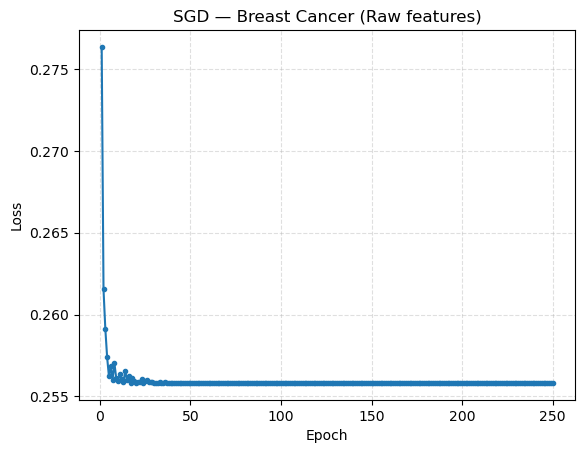

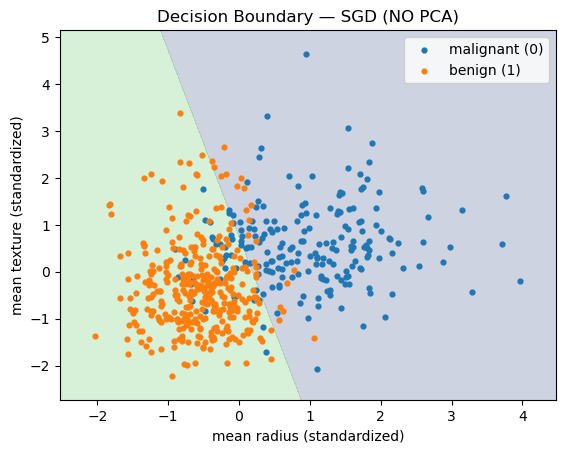

In [18]:
# sgd_breast_cancer_no_pca.py — Logistic Regression (SGD, NO PCA)
import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# ---- load + select two raw features ----
data = load_breast_cancer()
X_raw = data.data[:, [0, 1]].astype(np.float64)  # mean radius, mean texture
y = data.target.astype(np.float64)

X = StandardScaler().fit_transform(X_raw)
Xb = np.hstack([X, np.ones((X.shape[0], 1))])

X0, X1 = X[y == 0], X[y == 1]

sigmoid = lambda z: 1.0 / (1.0 + np.exp(-z))
def full_loss(W):
    p = sigmoid(Xb @ W); eps = 1e-12
    return -np.mean(y*np.log(p+eps) + (1-y)*np.log(1-p+eps))

# ---- training (SGD) ----
rng = np.random.default_rng(1337)
epochs = 250
eta0 = 0.05
use_exp_decay = True
delta = 0.97

W = rng.normal(scale=0.01, size=3)
losses = []
for t in range(epochs):
    eta = eta0 * (delta ** t) if use_exp_decay else eta0
    idx = rng.permutation(len(y))
    for i in idx:
        xi, yi = Xb[i], y[i]
        pi = sigmoid(xi @ W)
        grad = (pi - yi) * xi
        W -= eta * grad
    losses.append(full_loss(W))

print(f"Final loss = {losses[-1]:.4f}")

# ---- loss plot ----
plt.figure()
plt.plot(range(1, epochs+1), losses, marker='o', ms=3)
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title("SGD — Breast Cancer (Raw features)")
plt.grid(True, ls="--", alpha=.4)
plt.show()

# ---- decision boundary ----
x1_min, x1_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
x2_min, x2_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 400),
                     np.linspace(x2_min, x2_max, 400))
grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.size)]
probs = sigmoid(grid @ W).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.25)
plt.scatter(X0[:,0], X0[:,1], s=12, label="malignant (0)")
plt.scatter(X1[:,0], X1[:,1], s=12, label="benign (1)")
plt.legend()
plt.xlabel("mean radius (standardized)")
plt.ylabel("mean texture (standardized)")
plt.title("Decision Boundary — SGD (NO PCA)")
plt.show()


Final loss = 0.2558


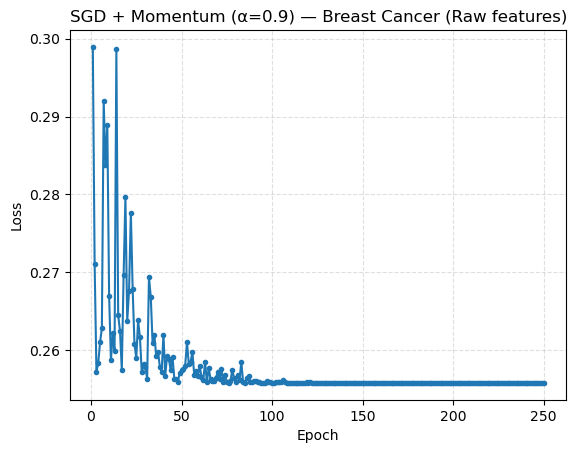

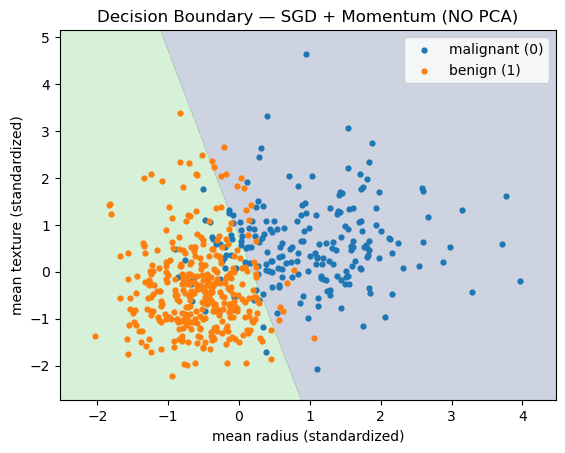

In [19]:
# sgd_momentum_breast_cancer_no_pca.py — Logistic Regression (SGD+Momentum, NO PCA)
import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# ---- load + select two raw features ----
data = load_breast_cancer()
X_raw = data.data[:, [0, 1]].astype(np.float64)  # mean radius, mean texture
y = data.target.astype(np.float64)

X = StandardScaler().fit_transform(X_raw)
Xb = np.hstack([X, np.ones((X.shape[0], 1))])

X0, X1 = X[y == 0], X[y == 1]

sigmoid = lambda z: 1.0 / (1.0 + np.exp(-z))
def full_loss(W):
    p = sigmoid(Xb @ W); eps = 1e-12
    return -np.mean(y*np.log(p+eps) + (1-y)*np.log(1-p+eps))

# ---- training (SGD + Momentum) ----
rng = np.random.default_rng(1337)
epochs = 250
eta0 = 0.05
alpha = 0.9
use_exp_decay = True
delta = 0.97

W = rng.normal(scale=0.01, size=3)
v = np.zeros_like(W)  # momentum buffer

losses = []
for t in range(epochs):
    eta = eta0 * (delta ** t) if use_exp_decay else eta0
    idx = rng.permutation(len(y))
    for i in idx:
        xi, yi = Xb[i], y[i]
        pi = sigmoid(xi @ W)
        grad = (pi - yi) * xi
        # ΔW(t+1) = -η_t ∇E + α ΔW(t)
        v = -eta * grad + alpha * v
        W = W + v
    losses.append(full_loss(W))

print(f"Final loss = {losses[-1]:.4f}")

# ---- loss plot ----
plt.figure()
plt.plot(range(1, epochs+1), losses, marker='o', ms=3)
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title(f"SGD + Momentum (α={alpha}) — Breast Cancer (Raw features)")
plt.grid(True, ls="--", alpha=.4)
plt.show()

# ---- decision boundary ----
x1_min, x1_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
x2_min, x2_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 400),
                     np.linspace(x2_min, x2_max, 400))
grid = np.c_[xx.ravel(), yy.ravel(), np.ones(xx.size)]
probs = sigmoid(grid @ W).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.25)
plt.scatter(X0[:,0], X0[:,1], s=12, label="malignant (0)")
plt.scatter(X1[:,0], X1[:,1], s=12, label="benign (1)")
plt.legend()
plt.xlabel("mean radius (standardized)")
plt.ylabel("mean texture (standardized)")
plt.title("Decision Boundary — SGD + Momentum (NO PCA)")
plt.show()
